Dataset Shape: (1000, 9)
   area  bedrooms  bathrooms  stories  parking has_pool has_garage has_ac  \
0  1360         2          4        3        3       no         no    yes   
1  4272         3          4        2        1      yes         no    yes   
2  3592         1          4        3        2       no         no    yes   
3   966         1          4        2        2       no         no    yes   
4  4926         2          4        3        0      yes        yes    yes   

          price  
0  7.251814e+05  
1  1.034741e+06  
2  8.546071e+05  
3  5.926111e+05  
4  1.099566e+06  

DATA INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   area        1000 non-null   int64  
 1   bedrooms    1000 non-null   int64  
 2   bathrooms   1000 non-null   int64  
 3   stories     1000 non-null   int64  
 4   parking     1000 non-null   int64  
 

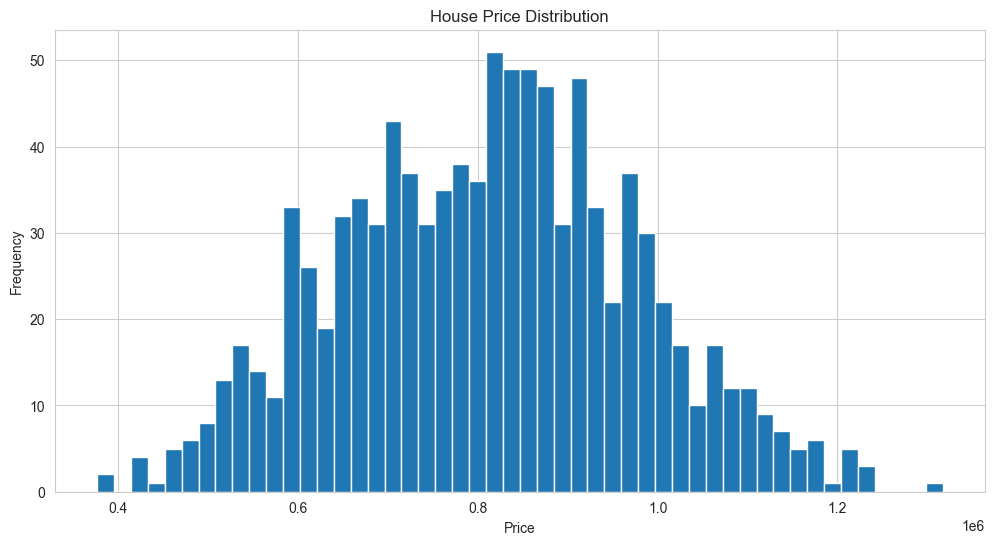

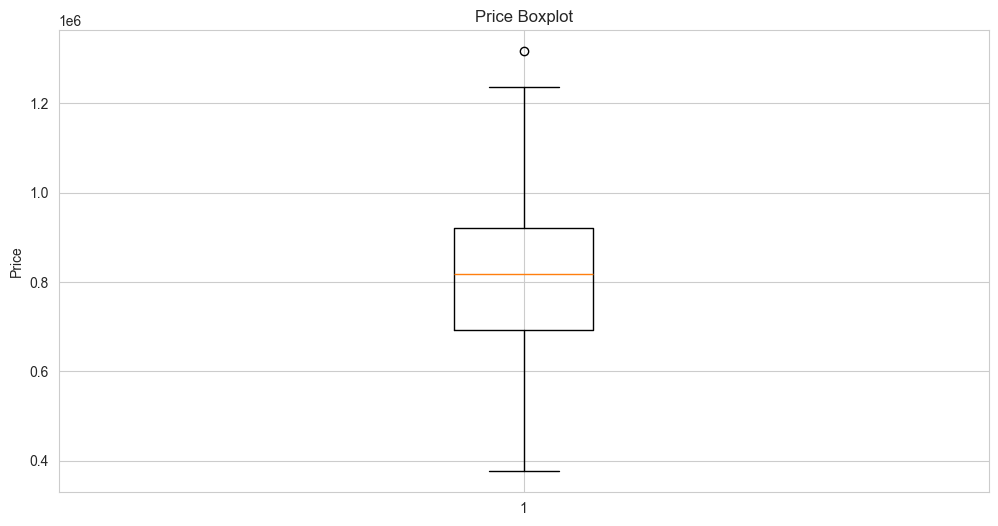

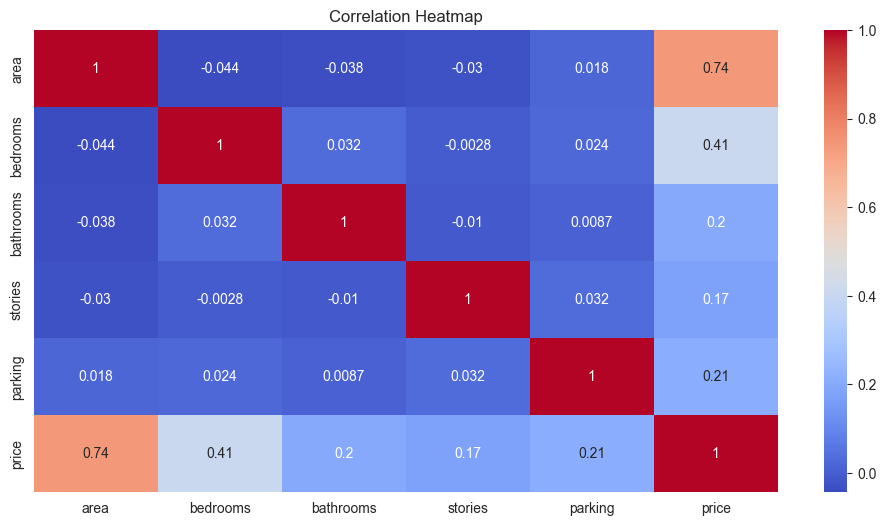

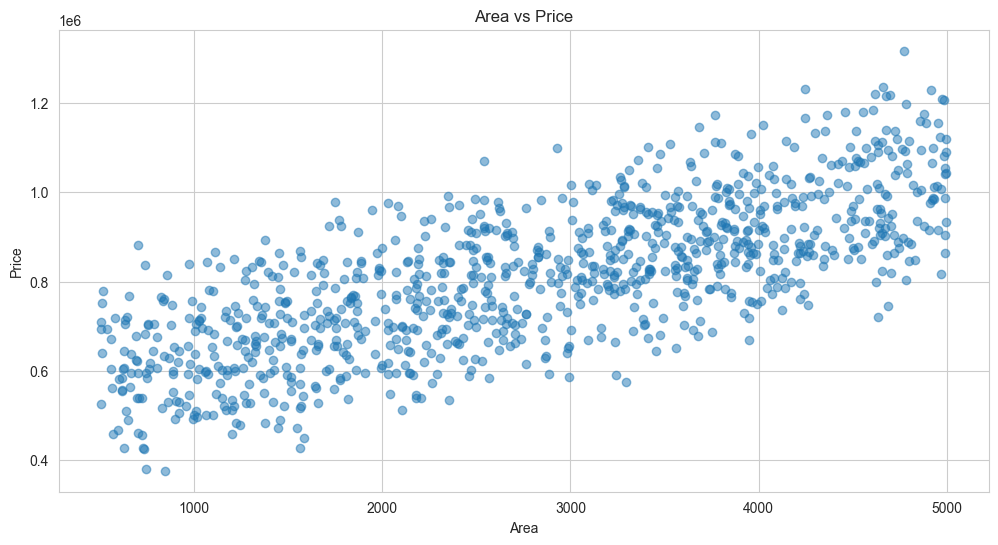

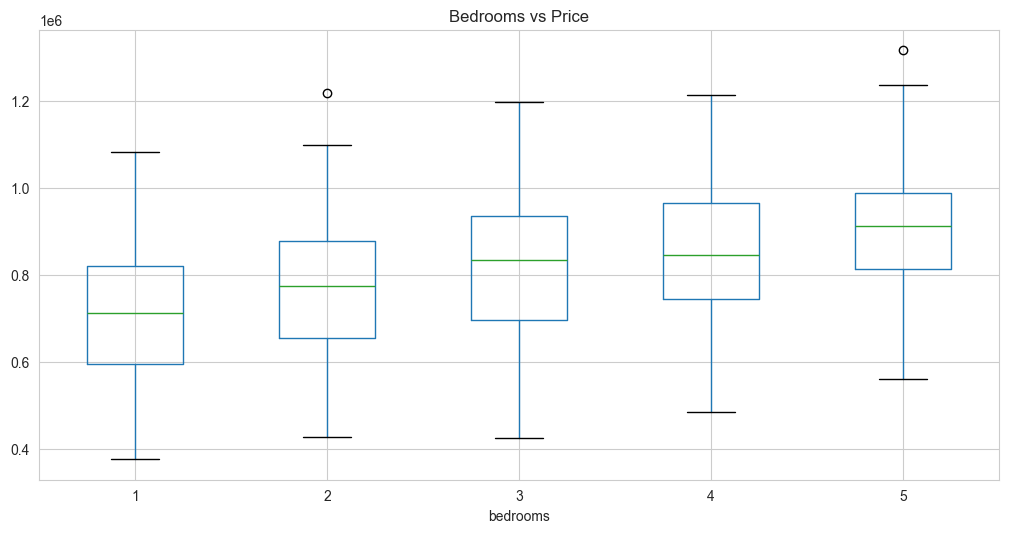

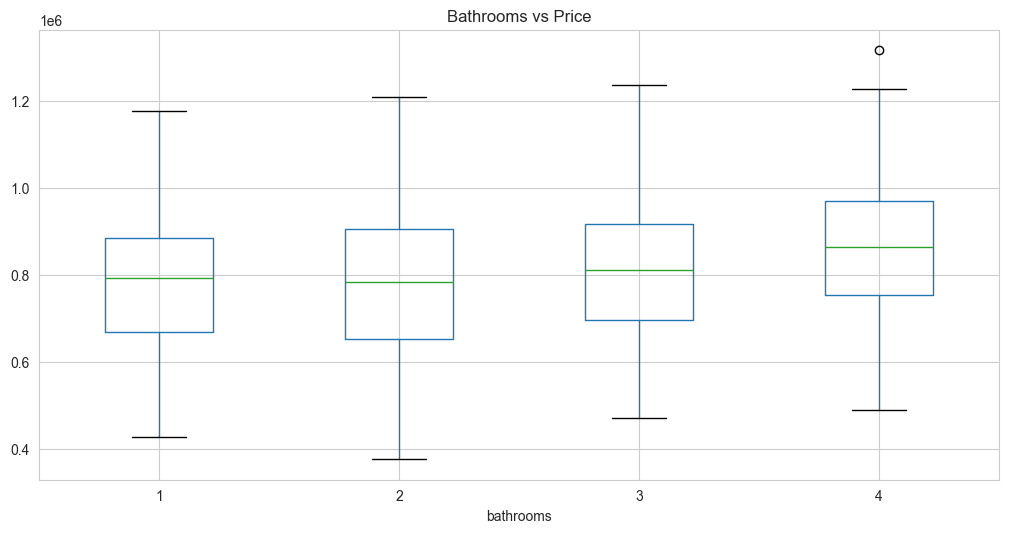

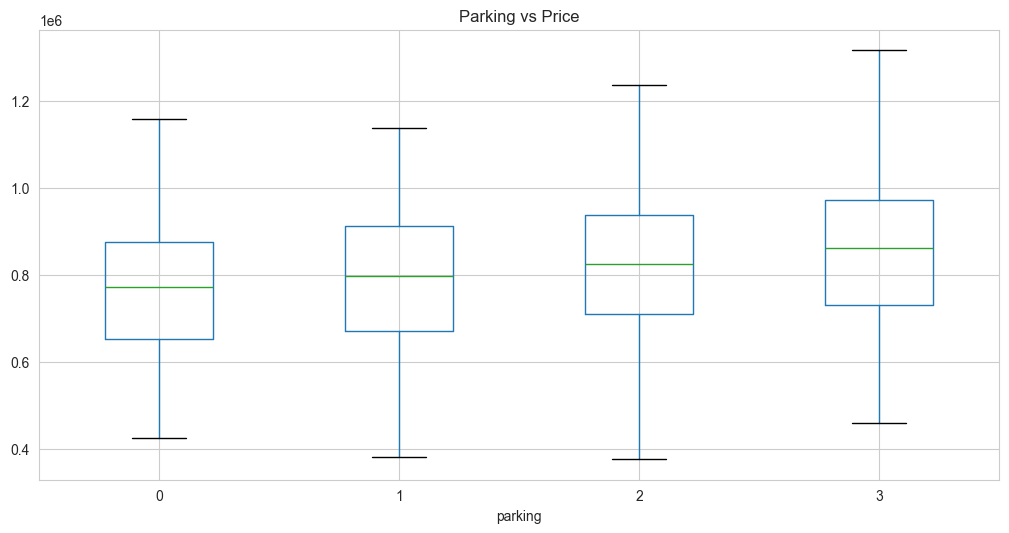

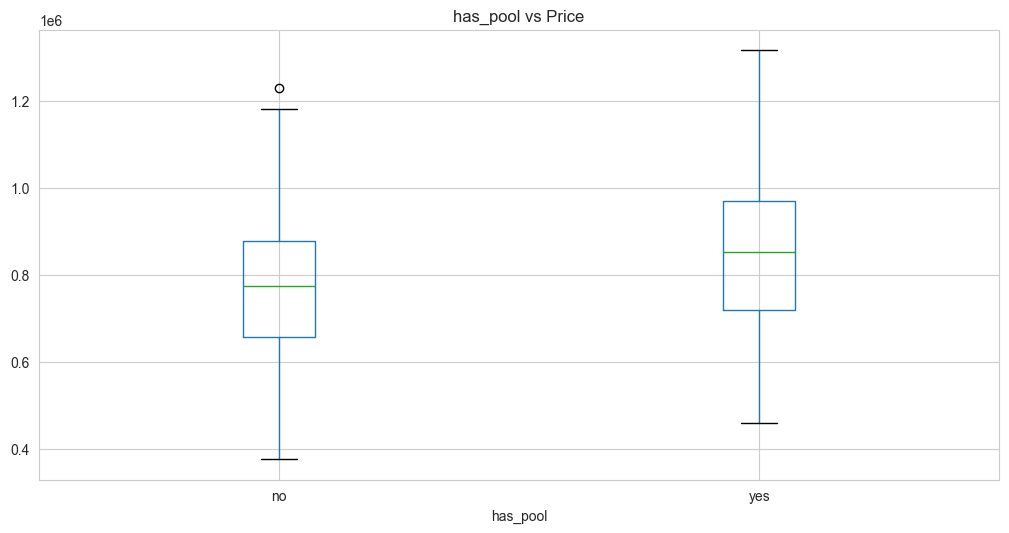

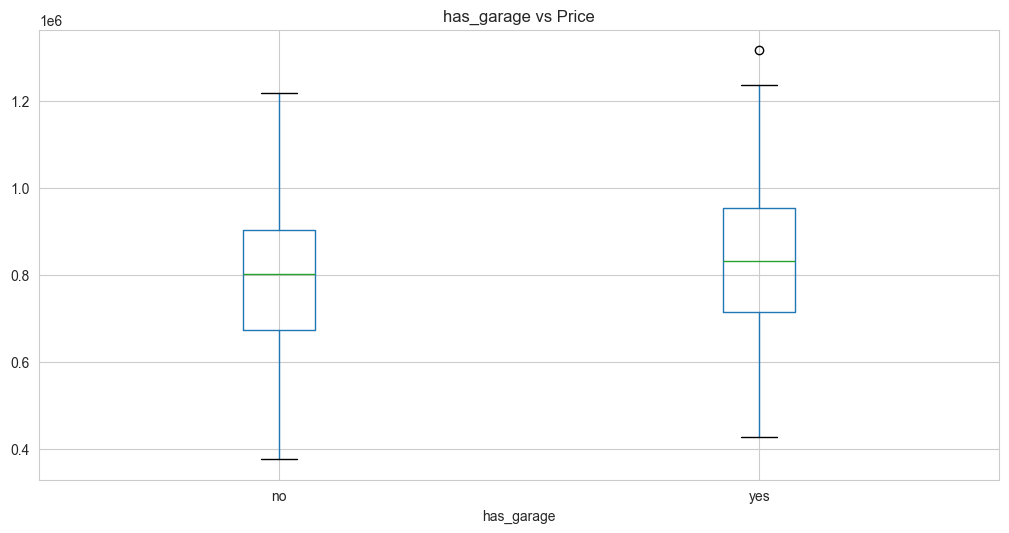

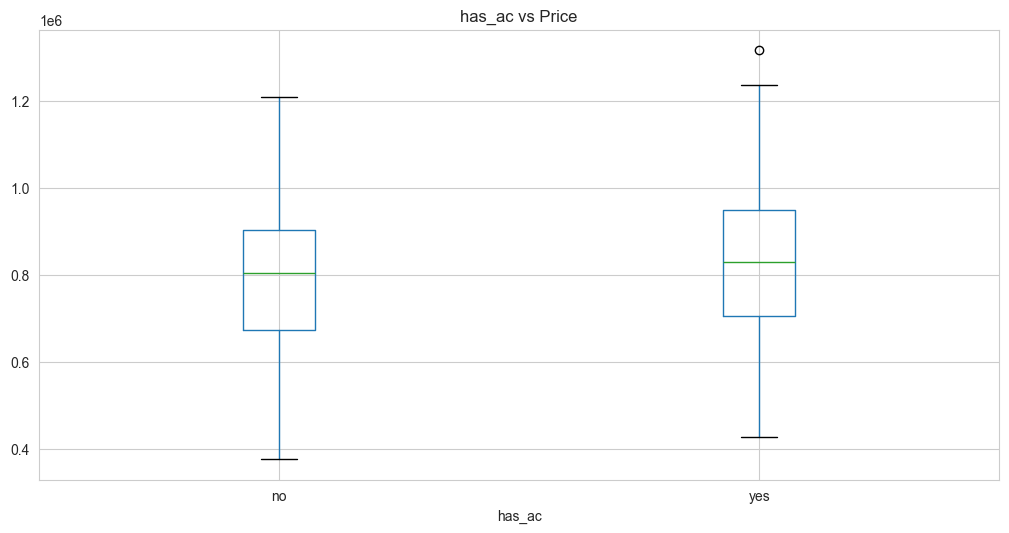


KEY INSIGHTS
Average Price: 811,217
Min Price: 376,295
Max Price: 1,316,825
Median Area: 2,862

Average Price by Feature:
has_pool
no     769437.389027
yes    853839.994576
Name: price, dtype: float64
has_garage
no     790456.287146
yes    833349.658277
Name: price, dtype: float64
has_ac
no     789598.530107
yes    830775.956139
Name: price, dtype: float64


In [ ]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


df = pd.read_csv('house_data.csv')

print("Dataset Shape:", df.shape)
print(df.head())


print("\nDATA INFO")
print(df.info())


print("\nSTATISTICAL SUMMARY")
print(df.describe())


print("\nMISSING VALUES")
print(df.isnull().sum())


plt.hist(df['price'], bins=50)
plt.title('House Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

plt.boxplot(df['price'])
plt.title('Price Boxplot')
plt.ylabel('Price')
plt.show()


numeric_cols = df.select_dtypes(include=np.number)
sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


plt.scatter(df['area'], df['price'], alpha=0.5)
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Area vs Price')
plt.show()


df.boxplot(column='price', by='bedrooms')
plt.title('Bedrooms vs Price')
plt.suptitle('')
plt.show()


df.boxplot(column='price', by='bathrooms')
plt.title('Bathrooms vs Price')
plt.suptitle('')
plt.show()


df.boxplot(column='price', by='parking')
plt.title('Parking vs Price')
plt.suptitle('')
plt.show()

for col in ['has_pool', 'has_garage', 'has_ac']:
    df.boxplot(column='price', by=col)
    plt.title(f'{col} vs Price')
    plt.suptitle('')
    plt.show()


print("\nKEY INSIGHTS")
print(f"Average Price: {df['price'].mean():,.0f}")
print(f"Min Price: {df['price'].min():,.0f}")
print(f"Max Price: {df['price'].max():,.0f}")
print(f"Median Area: {df['area'].median():,.0f}")

print("\nAverage Price by Feature:")
for col in ['has_pool', 'has_garage', 'has_ac']:
    print(df.groupby(col)['price'].mean())
